RMSE (Train): 10.82
RMSE (Test): 15.49
RMSE (Validation): 13.60
R^2 (Train): 1.00
R^2 (Test): 1.00
R^2 (Validation): 1.00


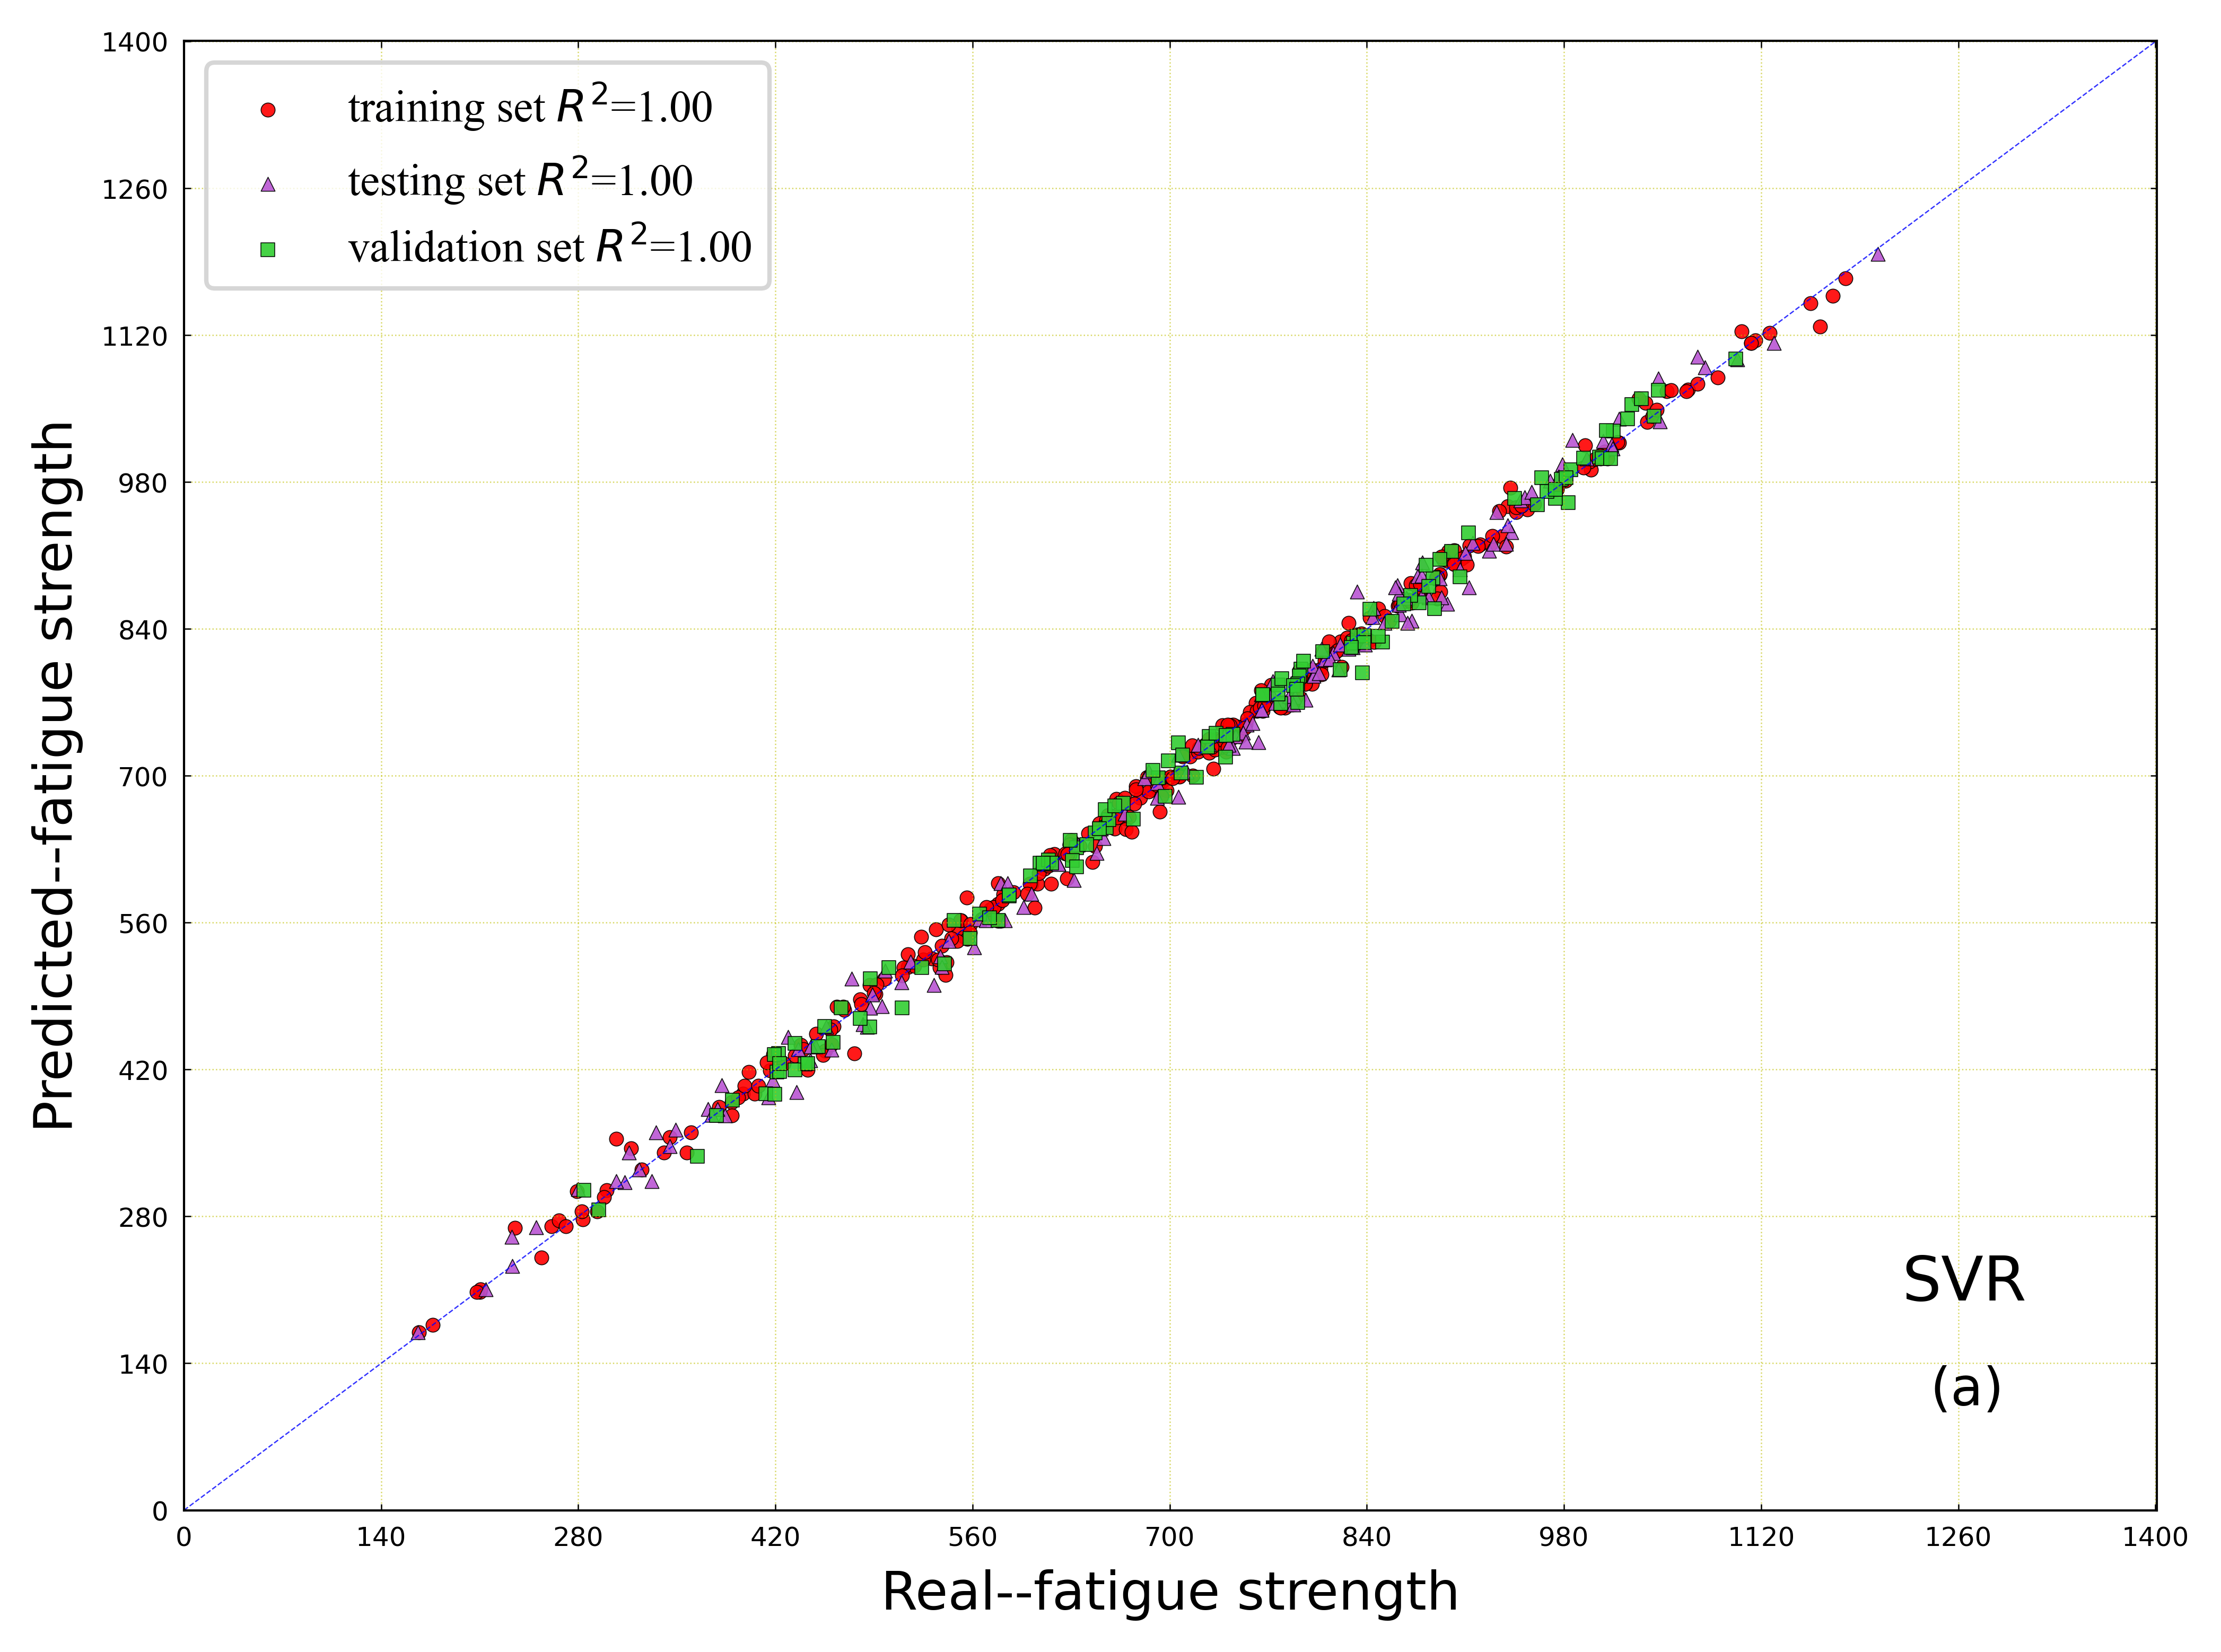

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 读取数据
features = pd.read_excel('疲劳验证.xlsx')
label1 = np.array(features['循环应力'])
features = features.drop(['疲劳强度'], axis=1)

# 对特征进行独热编码
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)

# 归一化处理
features = MinMaxScaler().fit_transform(features)

# 划分训练集、验证集和测试集
test_ratio = 0.25
validation_ratio = 0.2  # 20% 的数据用于验证集合
SEED = 26

# 划分训练集和临时集
train_features, temp_features, train_labels, temp_labels = train_test_split(features, label1,
                                                                            test_size=(test_ratio + validation_ratio),
                                                                            random_state=SEED)

# 划分临时集为测试集和验证集
test_features, validation_features, test_labels, validation_labels = train_test_split(temp_features, temp_labels,
                                                                                      test_size=validation_ratio / (test_ratio + validation_ratio),
                                                                                      random_state=SEED)

# 创建并拟合SVR模型
model_svr = SVR(C=2000, kernel='rbf', gamma=0.4444443333333)
model_svr.fit(train_features, train_labels)

# 预测结果
train_predicted_fatiguestrength = model_svr.predict(train_features)
test_predicted_fatiguestrength = model_svr.predict(test_features)
validation_predicted_fatiguestrength = model_svr.predict(validation_features)

# 计算性能指标
rmse_tr_rf = mean_squared_error(train_labels, train_predicted_fatiguestrength, squared=False)
rmse_te_rf = mean_squared_error(test_labels, test_predicted_fatiguestrength, squared=False)
rmse_val_rf = mean_squared_error(validation_labels, validation_predicted_fatiguestrength, squared=False)
r2_tr_rf = r2_score(train_labels, train_predicted_fatiguestrength)
r2_te_rf = r2_score(test_labels, test_predicted_fatiguestrength)
r2_val_rf = r2_score(validation_labels, validation_predicted_fatiguestrength)

# 设置绘图参数
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams['figure.dpi'] = 1200
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

new_ticks = list(np.arange(0, 1401, 140))
plt.xticks(new_ticks, fontsize=6)
plt.yticks(new_ticks, fontsize=6)
# 绘制散点图
plt.scatter(train_labels, train_predicted_fatiguestrength, alpha=0.9, s=10, linewidths=0.2, c='#FF0000',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels, test_predicted_fatiguestrength, alpha=0.9, s=10, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='^')
plt.scatter(validation_labels, validation_predicted_fatiguestrength, alpha=0.9, s=10, linewidths=0.2, c='#32CD32',
            edgecolor='#000000', label='validation set' + ' ' + '$R^2$=%.2f' % r2_val_rf, marker='s')

plt.plot([0, 1401], [0, 1401], 'b--', linewidth='0.3', alpha=0.8)
#plt.plot([0, 1801], [200, 2000], 'k--', linewidth='0.2', alpha=0.8)
#plt.plot([200, 2000], [0, 1801], 'k--', linewidth='0.2', alpha=0.8)
plt.ylim(0, 1401)
plt.xlim(0, 1401)
# 显示性能指标
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("RMSE (Validation): {:.2f}".format(rmse_val_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))
print("R^2 (Validation): {:.2f}".format(r2_val_rf))

# 显示绘图
plt.legend(prop={'family': 'Times New Roman', 'size': 10}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--fatigue strength', size=12)
plt.ylabel('Predicted--fatigue strength', size=12)
plt.text(1220, 200, 'SVR', fontsize=14)  # 在图中添加文字
plt.text(1240, 100, '(a)', fontsize=12)  # 在图中添加文字
plt.show()

RMSE (Train): 20.76
RMSE (Test): 49.79
RMSE (Validation): 39.90
R^2 (Train): 0.99
R^2 (Test): 0.95
R^2 (Validation): 0.96


Text(1220, 200, 'RFR')

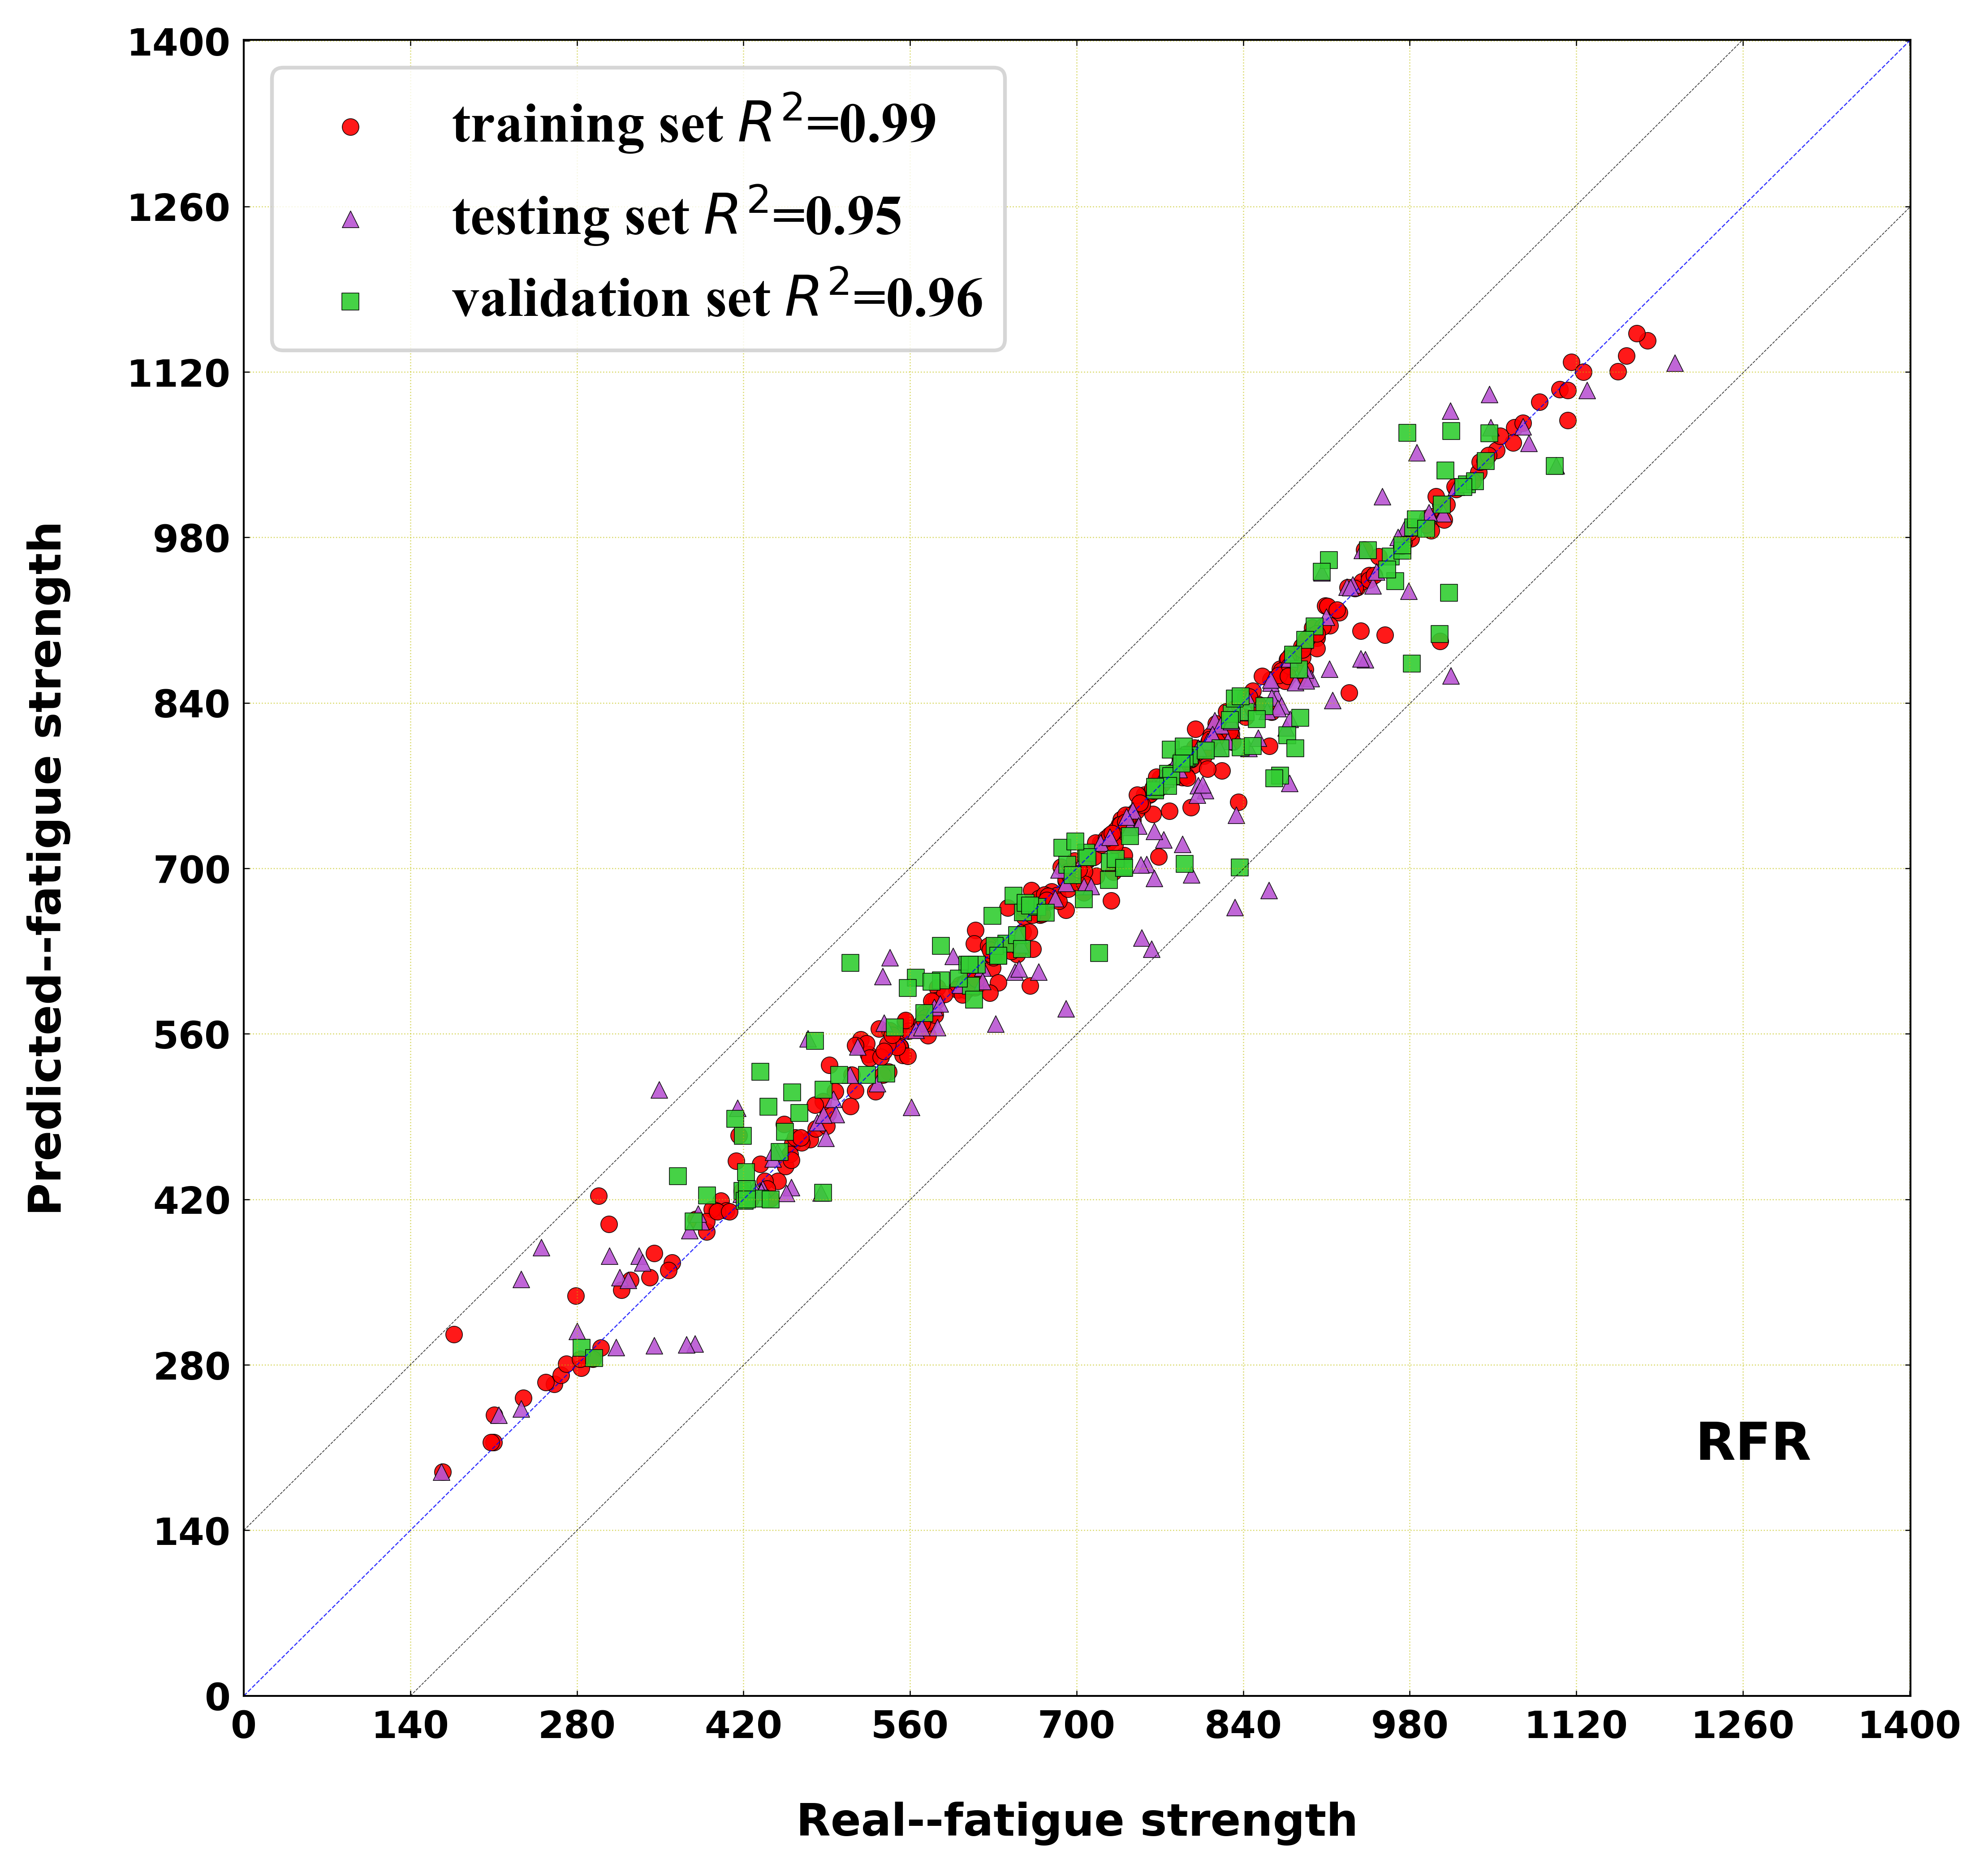

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# 读取数据
features = pd.read_excel('疲劳验证.xlsx')
label1 = np.array(features['疲劳强度'])
features = features.drop(['疲劳强度'], axis=1)

# 对特征进行独热编码
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)

# 归一化处理
features = MinMaxScaler().fit_transform(features)

# 划分训练集、验证集和测试集
test_ratio = 0.25
validation_ratio = 0.2  # 20% 的数据用于验证集合
SEED = 26

# 划分训练集和临时集
train_features, temp_features, train_labels, temp_labels = train_test_split(features, label1,
                                                                            test_size=(test_ratio + validation_ratio),
                                                                            random_state=SEED)

# 划分临时集为测试集和验证集
test_features, validation_features, test_labels, validation_labels = train_test_split(temp_features, temp_labels,
                                                                                      test_size=validation_ratio / (test_ratio + validation_ratio),
                                                                                      random_state=SEED)

# Create and fit the RF model
model_seed = 100
model_rf = RandomForestRegressor(random_state=model_seed)
model_rf.fit(train_features, train_labels)

# 预测结果
train_predicted_fatiguestrength = model_rf.predict(train_features)
test_predicted_fatiguestrength = model_rf.predict(test_features)
validation_predicted_fatiguestrength = model_rf.predict(validation_features)

# 计算性能指标
rmse_tr_rf = mean_squared_error(train_labels, train_predicted_fatiguestrength, squared=False)
rmse_te_rf = mean_squared_error(test_labels, test_predicted_fatiguestrength, squared=False)
rmse_val_rf = mean_squared_error(validation_labels, validation_predicted_fatiguestrength, squared=False)
r2_tr_rf = r2_score(train_labels, train_predicted_fatiguestrength)
r2_te_rf = r2_score(test_labels, test_predicted_fatiguestrength)
r2_val_rf = r2_score(validation_labels, validation_predicted_fatiguestrength)

# 设置绘图参数
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

new_ticks = list(np.arange(0, 1401, 140))
plt.xticks(new_ticks, fontsize=10, fontweight='bold')  # 增加粗细
plt.yticks(new_ticks, fontsize=10, fontweight='bold')  # 增加粗细

# 绘制散点图
plt.scatter(train_labels, train_predicted_fatiguestrength, alpha=0.9, s=20, linewidths=0.2, c='#FF0000',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels, test_predicted_fatiguestrength, alpha=0.9, s=20, linewidths=0.2, c='#BA55D3',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='^')
plt.scatter(validation_labels, validation_predicted_fatiguestrength, alpha=0.9, s=20, linewidths=0.2, c='#32CD32',
            edgecolor='#000000', label='validation set' + ' ' + '$R^2$=%.2f' % r2_val_rf, marker='s')

plt.plot([0, 1401], [0, 1401], 'b--', linewidth='0.3', alpha=0.8)
plt.plot([0, 1260], [140, 1401], 'k--', linewidth='0.2', alpha=0.8)
plt.plot([140, 1401], [0, 1260], 'k--', linewidth='0.2', alpha=0.8)
plt.ylim(0, 1401)
plt.xlim(0, 1401)

# 显示性能指标
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("RMSE (Validation): {:.2f}".format(rmse_val_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))
print("R^2 (Validation): {:.2f}".format(r2_val_rf))

# 显示绘图
plt.legend(prop={'family': 'Times New Roman', 'size': 15, 'weight': 'bold'}, ncol=1)
plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--fatigue strength', size=12, weight='bold',labelpad=15)  # 增加粗细
plt.ylabel('Predicted--fatigue strength', size=12, weight='bold',labelpad=15)  # 增加粗细
plt.text(1220, 200, 'RFR', fontsize=14, weight='bold')  # 在图中添加文字
# plt.text(1240, 100, '(b)', fontsize=12)  # 在